### 🚗 Project Title: Used Car Price Prediction

🎯 Objective:

To predict the selling price of used cars based on various car features such as mileage, engine capacity, year of manufacture, fuel type, transmission type, and other specifications using machine learning regression models.

To develop a machine learning-based predictive model that accurately estimates the selling price of used cars by analyzing key automobile attributes such as mileage, engine capacity, manufacturing year, fuel type, transmission type, and other performance indicators.
The goal is to build a data-driven decision-support system that helps car dealers and buyers determine fair market values efficiently.

🧩 Problem Statement

The used car market has grown rapidly, making it challenging for both buyers and sellers to determine the fair value of a vehicle. Prices vary significantly based on multiple factors such as brand, model, mileage, engine power, age, fuel type, and transmission.
Traditional estimation methods rely heavily on human judgment and lack consistency.
The objective of this project is to build a reliable machine learning model that can accurately predict the selling price of a used car based on its key features.
This solution aims to reduce guesswork, improve transparency, and support data-driven pricing decisions in the automobile industry.

📊 Dataset Description

The dataset contains information about used cars and their corresponding attributes that influence their market price. Each row represents a single car listing, and each column provides a specific feature about that car.

### Importing Essential Libraries for Data Processing and Model Building

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
data = pd.read_csv(r"D:\New_Project\cardekho_dataset.csv")

In [163]:
data

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [164]:
data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [165]:
data.shape

(15411, 14)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [167]:
data.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [168]:
data.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,9811.86,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,5643.42,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,0.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,4906.50,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,9872.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,14668.50,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,19543.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


### Data Cleaning and Preparation for Modeling

- Checked and removed null / invalid / outlier values.
- Created new derived features like power_per_CC.
- Dropped highly correlated columns using VIF (e.g., engine_CC).
- Scaled numerical columns using StandardScaler.
- Encoded categorical variables (brand, model, fuel_type, etc.)

In [169]:
data.drop(columns='Unnamed: 0',inplace=True)

In [170]:
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [171]:
data.rename(columns={'mileage' : 'mileage_kmpl'},inplace=True)

data.rename(columns={'engine' : 'engine_CC'},inplace=True)

In [172]:
data['mileage_per_CC'] = data['mileage_kmpl']/data['engine_CC']

In [173]:
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,engine_CC,max_power,seats,selling_price,mileage_per_CC
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.02
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,0.02
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,0.01
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.02
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000,0.02
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000,0.01
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000,0.01
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000,0.01


In [174]:
data[['mileage_per_CC','selling_price']].corr()

,mileage_per_CC,selling_price
mileage_per_CC,1.00,-0.43
selling_price,-0.43,1.00


In [175]:
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,engine_CC,max_power,seats,selling_price,mileage_per_CC
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.02
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,0.02
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,0.01
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.02
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000,0.02
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000,0.01
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000,0.01
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000,0.01


In [176]:
data.duplicated().sum()

np.int64(167)

In [177]:
data = data.drop_duplicates()

In [178]:
data.describe()

,vehicle_age,km_driven,mileage_kmpl,engine_CC,max_power,seats,selling_price,mileage_per_CC
count,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00
mean,6.04,55639.58,19.70,1486.17,100.61,5.33,774701.45,0.02
std,3.02,51766.30,4.17,520.42,42.92,0.81,894676.08,0.01
min,0.00,100.00,4.00,793.00,38.40,0.00,40000.00,0.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00,0.01
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,559000.00,0.02
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00,0.02
max,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00,0.04


In [179]:
data[(data['mileage_kmpl'] <= 0) | (data['engine_CC'] <= 0)]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,engine_CC,max_power,seats,selling_price,mileage_per_CC


In [180]:
data['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [181]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [182]:
data.corr(numeric_only=True)

,vehicle_age,km_driven,mileage_kmpl,engine_CC,max_power,seats,selling_price,mileage_per_CC
vehicle_age,1.00,0.33,-0.26,0.10,0.00,0.03,-0.24,-0.16
km_driven,0.33,1.00,-0.10,0.19,0.04,0.19,-0.08,-0.16
mileage_kmpl,-0.26,-0.10,1.00,-0.63,-0.53,-0.44,-0.31,0.84
engine_CC,0.10,0.19,-0.63,1.00,0.81,0.55,0.59,-0.84
max_power,0.00,0.04,-0.53,0.81,1.00,0.17,0.75,-0.71
seats,0.03,0.19,-0.44,0.55,0.17,1.00,0.12,-0.48
selling_price,-0.24,-0.08,-0.31,0.59,0.75,0.12,1.00,-0.43
mileage_per_CC,-0.16,-0.16,0.84,-0.84,-0.71,-0.48,-0.43,1.00


In [183]:
data.drop(columns='mileage_per_CC',inplace=True)

In [184]:
data['power_per_CC'] = data['max_power'] / data['engine_CC']

In [185]:
X = data[['vehicle_age', 'km_driven', 'mileage_kmpl', 'power_per_CC', 'seats']]

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_values = []
for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    vif_values.append(vif)

vif_data["VIF"] = vif_values

print(vif_data)

        Feature    VIF
0         const 339.21
1   vehicle_age   1.31
2     km_driven   1.18
3  mileage_kmpl   1.59
4  power_per_CC   1.46
5         seats   1.77


In [186]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [187]:
data.drop(['engine_CC'], axis=1, inplace=True)

In [188]:
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,selling_price,power_per_CC
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,46.30,5,120000,0.06
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,82.00,5,550000,0.07
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,80.00,5,215000,0.07
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,67.10,5,226000,0.07
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,98.59,5,570000,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,68.05,5,250000,0.06
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,91.10,7,925000,0.07
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,103.52,5,425000,0.07
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,140.00,7,1225000,0.06


In [189]:
X = sm.add_constant(data[['vehicle_age', 'km_driven', 'mileage_kmpl', 'max_power', 'seats', 'power_per_CC']])

In [190]:
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,selling_price,power_per_CC
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,46.30,5,120000,0.06
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,82.00,5,550000,0.07
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,80.00,5,215000,0.07
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,67.10,5,226000,0.07
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,98.59,5,570000,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,68.05,5,250000,0.06
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,91.10,7,925000,0.07
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,103.52,5,425000,0.07
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,140.00,7,1225000,0.06


In [191]:
numeric_col = ['vehicle_age', 'km_driven', 'mileage_kmpl', 'max_power', 'power_per_CC','selling_price']

for col in numeric_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    
    data = data[(data[col] >= lower_limit) & (data[col] <= upper_limit)]

In [192]:
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,selling_price,power_per_CC
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,46.30,5,120000,0.06
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,82.00,5,550000,0.07
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,80.00,5,215000,0.07
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,67.10,5,226000,0.07
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,98.59,5,570000,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15405,Hyundai Grand,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,82.00,5,545000,0.07
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,68.05,5,250000,0.06
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,91.10,7,925000,0.07
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,103.52,5,425000,0.07


In [193]:
Fuel_Type_values = LabelEncoder()
data['fuel_type'] = Fuel_Type_values.fit_transform(data['fuel_type'])

In [194]:
transmission_type_values = LabelEncoder()
data['transmission_type'] = transmission_type_values.fit_transform(data['transmission_type'])

In [195]:
seller_type_values = LabelEncoder()
data['seller_type'] = seller_type_values.fit_transform(data['seller_type'])

In [196]:
data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,selling_price,power_per_CC
0,Maruti Alto,Maruti,Alto,9,120000,1,3,1,19.70,46.30,5,120000,0.06
1,Hyundai Grand,Hyundai,Grand,5,20000,1,3,1,18.90,82.00,5,550000,0.07
2,Hyundai i20,Hyundai,i20,11,60000,1,3,1,17.00,80.00,5,215000,0.07
3,Maruti Alto,Maruti,Alto,9,37000,1,3,1,20.92,67.10,5,226000,0.07
4,Ford Ecosport,Ford,Ecosport,6,30000,0,1,1,22.77,98.59,5,570000,0.07


In [197]:
data.drop(columns='car_name',inplace=True)

In [198]:
brand_values = LabelEncoder()
data['brand'] = brand_values.fit_transform(data['brand'])

In [199]:
model_values = LabelEncoder()
data['model'] = model_values.fit_transform(data['model'])

In [200]:
data

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,selling_price,power_per_CC
0,10,3,9,120000,1,3,1,19.70,46.30,5,120000,0.06
1,5,34,5,20000,1,3,1,18.90,82.00,5,550000,0.07
2,5,73,11,60000,1,3,1,17.00,80.00,5,215000,0.07
3,10,3,9,37000,1,3,1,20.92,67.10,5,226000,0.07
4,3,24,6,30000,0,1,1,22.77,98.59,5,570000,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...
15405,5,34,5,9229,0,3,1,18.90,82.00,5,545000,0.07
15406,5,72,9,10723,0,3,1,19.81,68.05,5,250000,0.06
15407,10,28,2,18000,0,3,1,17.50,91.10,7,925000,0.07
15408,14,47,6,67000,0,1,1,21.14,103.52,5,425000,0.07


In [201]:
data['brand'].unique()

array([10,  5,  3, 13, 17,  4, 16,  9,  2, 15,  7,  0, 14, 11,  8,  6, 12,
        1])

In [202]:
data['model'].max()

74

In [203]:
model_avg_price = data.groupby('model')['selling_price'].mean()
data['model_encoded'] = data['model'].map(model_avg_price)

In [204]:
data['model_encoded'] = data['model'].map(data['model'].value_counts())

In [205]:
model_mean_price = data.groupby('model')['selling_price'].mean()
data['model_encoded'] = data['model'].map(model_mean_price)
data.drop(['model'], axis=1, inplace=True)

In [206]:
print(data.columns)


Index(['brand', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage_kmpl', 'max_power', 'seats',
       'selling_price', 'power_per_CC', 'model_encoded'],
      dtype='object')


In [207]:
data

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,selling_price,power_per_CC,model_encoded
0,10,9,120000,1,3,1,19.70,46.30,5,120000,0.06,253954.02
1,5,5,20000,1,3,1,18.90,82.00,5,550000,0.07,475872.11
2,5,11,60000,1,3,1,17.00,80.00,5,215000,0.07,545175.87
3,10,9,37000,1,3,1,20.92,67.10,5,226000,0.07,253954.02
4,3,6,30000,0,1,1,22.77,98.59,5,570000,0.07,712251.45
...,...,...,...,...,...,...,...,...,...,...,...,...
15405,5,5,9229,0,3,1,18.90,82.00,5,545000,0.07,475872.11
15406,5,9,10723,0,3,1,19.81,68.05,5,250000,0.06,279818.86
15407,10,2,18000,0,3,1,17.50,91.10,7,925000,0.07,721271.08
15408,14,6,67000,0,1,1,21.14,103.52,5,425000,0.07,570321.84


## EDA (Exploratory Data Analysis)

- Count plots for categorical columns (fuel_type, seller_type, etc.).
- Correlation heatmap.
- Scatter plots and boxplots (price vs numerical features).
- Understood the relationship between mileage, power, and price.

- Helps us to understand distribution of individual features.
- KDE (Kernel Density Estimate) curve

For numeric columns:

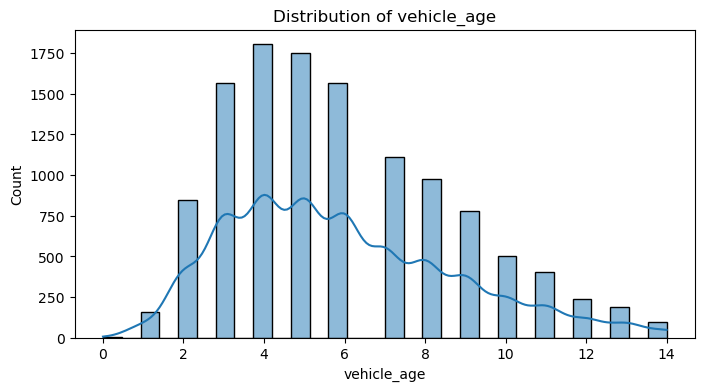

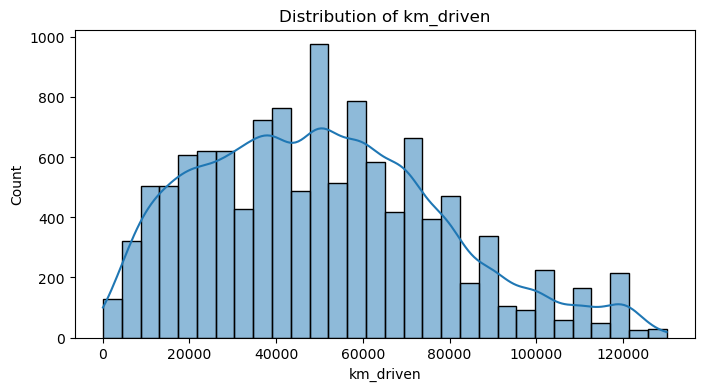

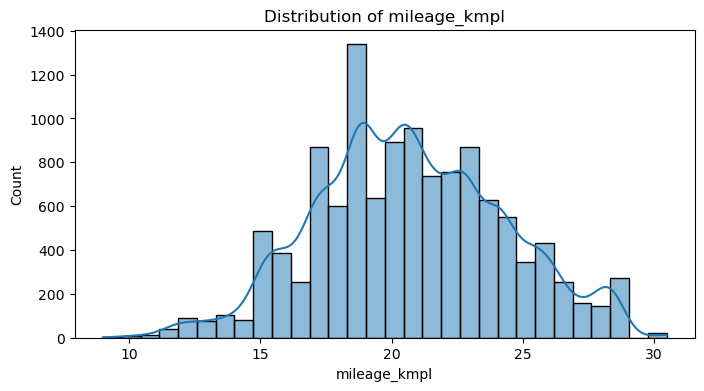

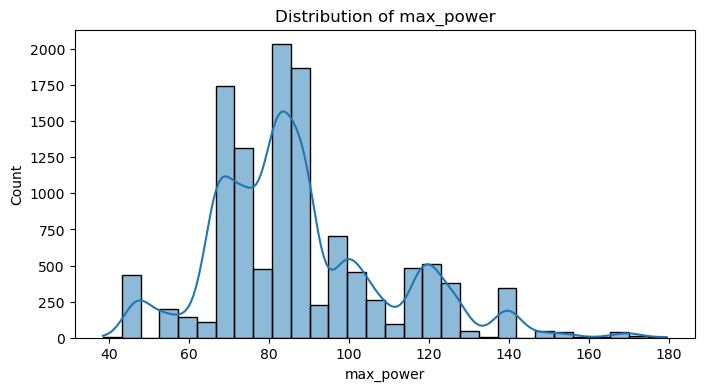

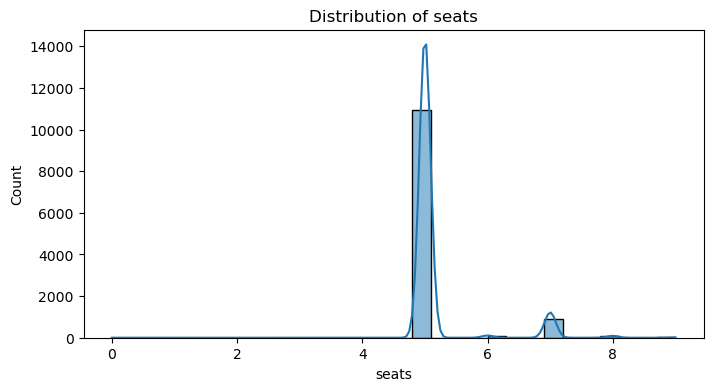

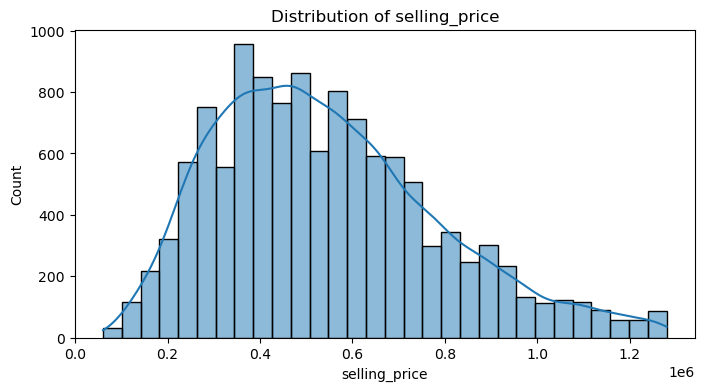

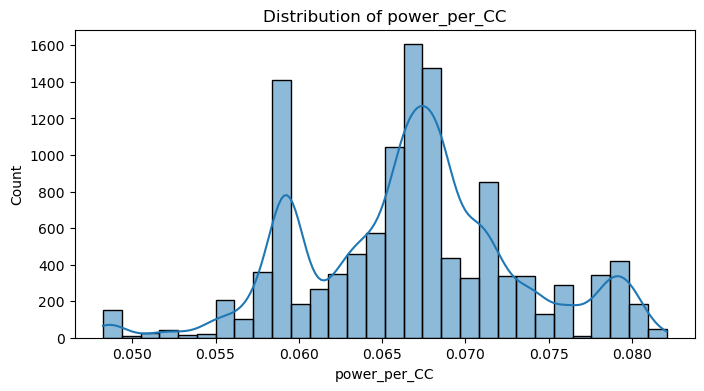

In [208]:
numeric_cols = ['vehicle_age', 'km_driven', 'mileage_kmpl',
                'max_power', 'seats', 'selling_price', 'power_per_CC']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [209]:
data.head()

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,selling_price,power_per_CC,model_encoded
0,10,9,120000,1,3,1,19.70,46.30,5,120000,0.06,253954.02
1,5,5,20000,1,3,1,18.90,82.00,5,550000,0.07,475872.11
2,5,11,60000,1,3,1,17.00,80.00,5,215000,0.07,545175.87
3,10,9,37000,1,3,1,20.92,67.10,5,226000,0.07,253954.02
4,3,6,30000,0,1,1,22.77,98.59,5,570000,0.07,712251.45


In [210]:
data_viz = data.copy()

fuel_map = {3: 'Petrol', 1: 'Diesel', 0: 'CNG', 2: 'Electric'}
seller_map = {0: 'Individual', 1: 'Dealer', 2: 'Trustmark Dealer'}
transmission_map = {1: 'Manual', 0: 'Automatic'}

data_viz['fuel_type'] = data_viz['fuel_type'].map(fuel_map)
data_viz['seller_type'] = data_viz['seller_type'].map(seller_map)
data_viz['transmission_type'] = data_viz['transmission_type'].map(transmission_map)

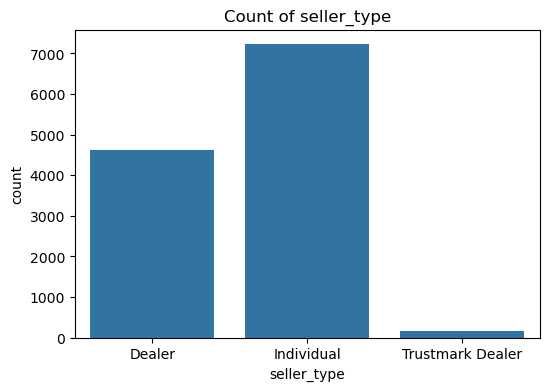

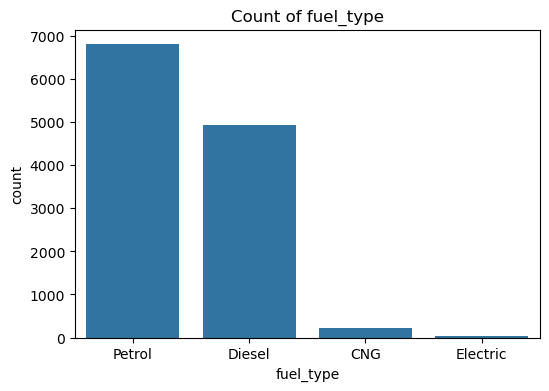

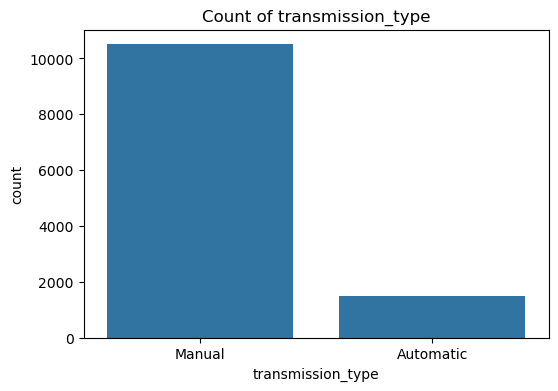

In [211]:
categorical_cols = ['seller_type', 'fuel_type', 'transmission_type']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data_viz)
    plt.title(f'Count of {col}')
    plt.show()


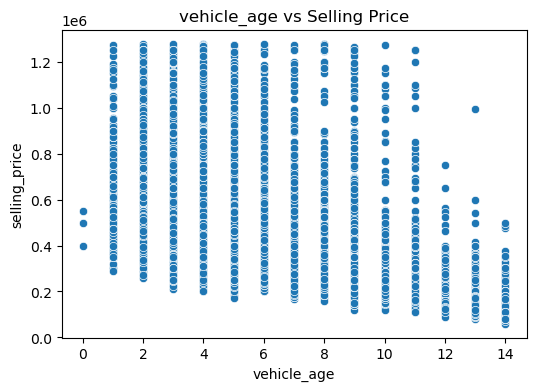

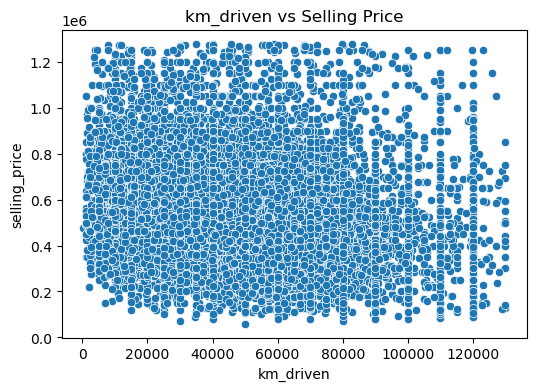

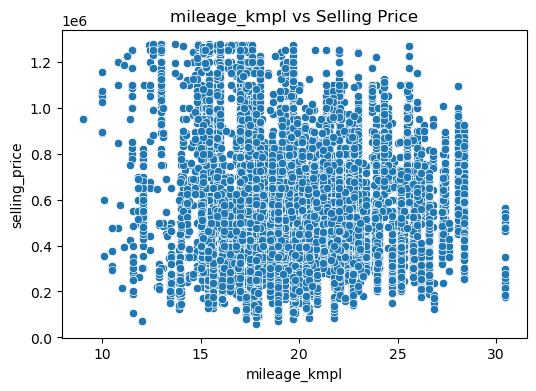

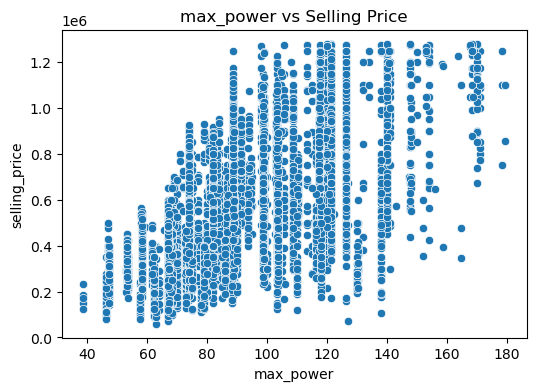

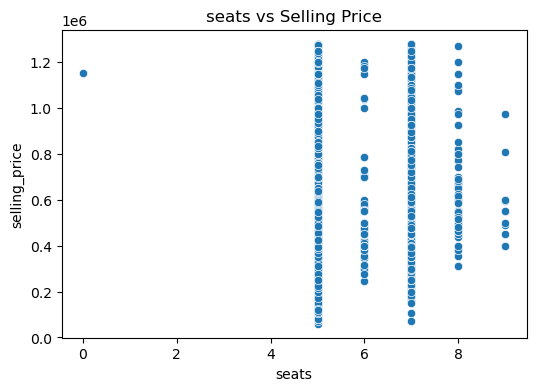

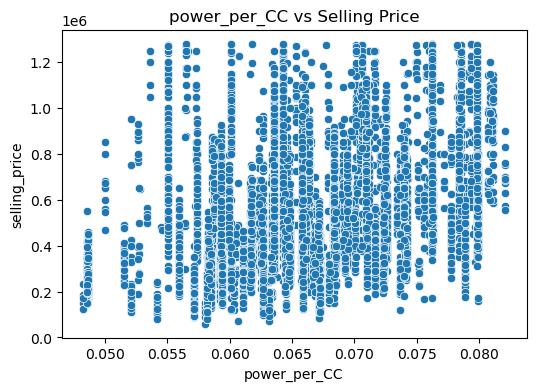

In [212]:
for col in numeric_cols:
    if col != 'selling_price':
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=col, y='selling_price', data=data)
        plt.title(f'{col} vs Selling Price')
        plt.show()


In [213]:
data.head(2)

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,selling_price,power_per_CC,model_encoded
0,10,9,120000,1,3,1,19.70,46.30,5,120000,0.06,253954.02
1,5,5,20000,1,3,1,18.90,82.00,5,550000,0.07,475872.11


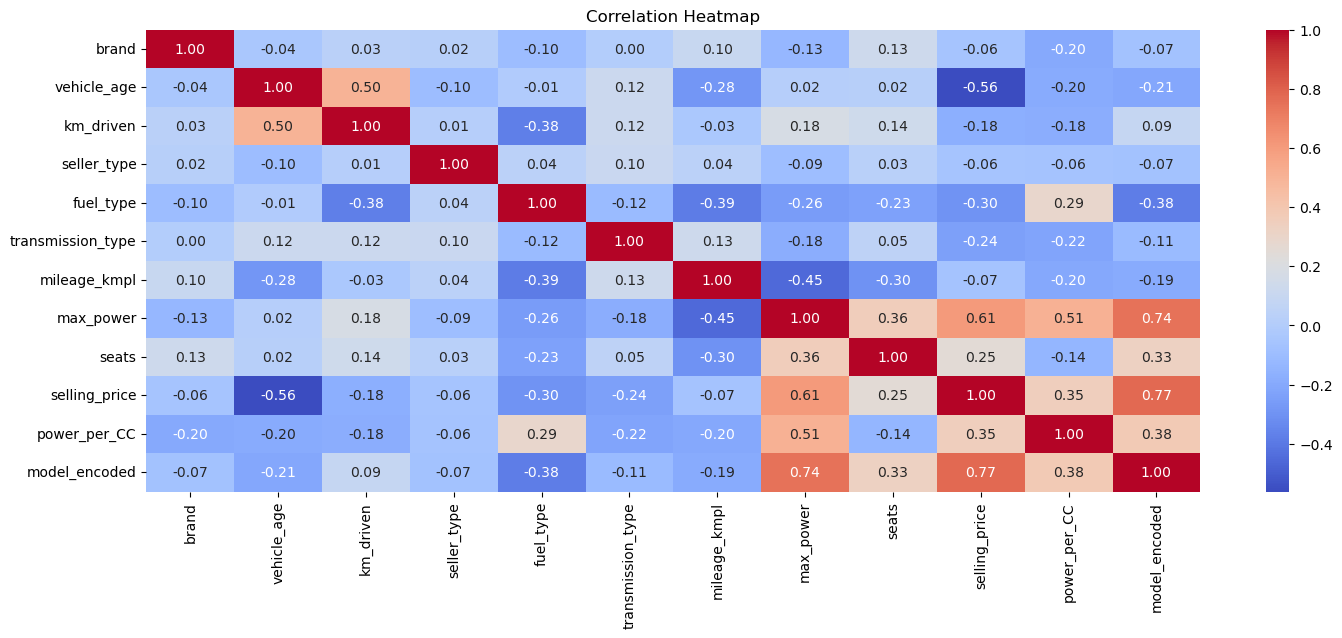

In [214]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


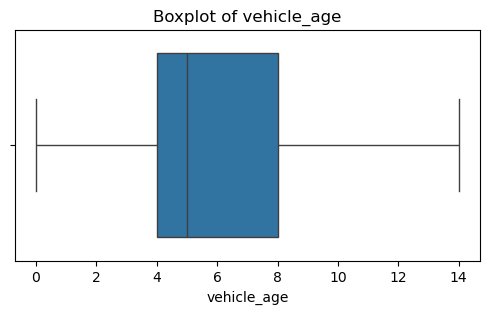

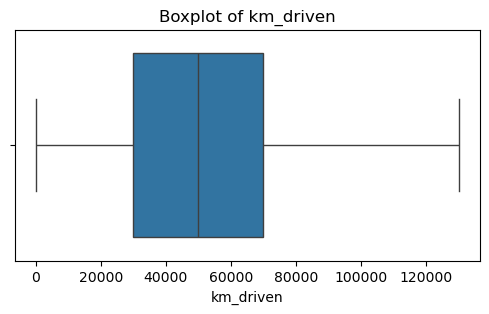

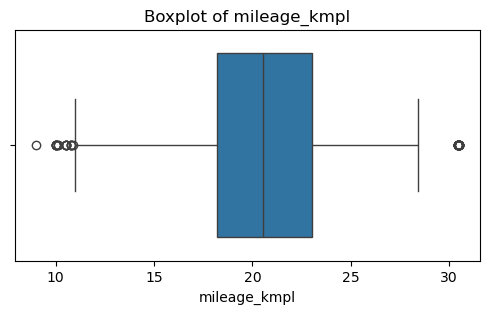

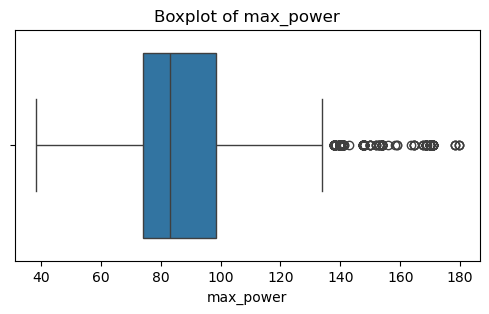

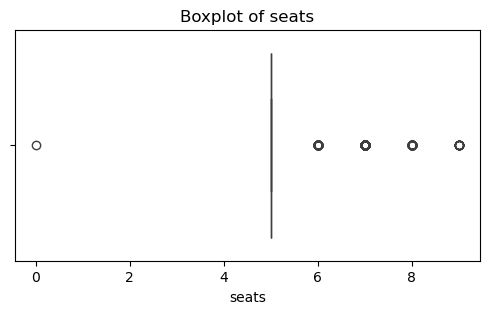

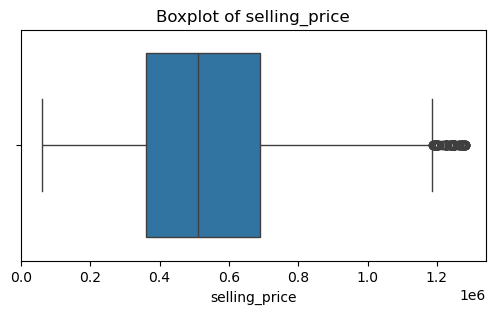

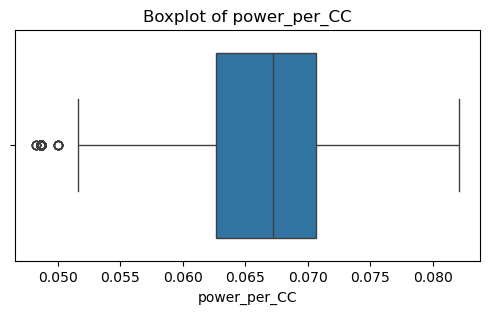

In [215]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### train_test_split Data

- Linear Regression
- Ridge Regression
- Lasso Regression

- R² Score
- Adjusted R²
- RMSE (Root Mean Squared Error)

In [216]:
X = data.drop('selling_price', axis=1)
y = data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [218]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [219]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [220]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [221]:
for model in [lr, ridge, lasso]:
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print("R²:", r2_score(y_test, y_pred))

    R2 = 0.8199701077212481 
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1-R2)*(n-1)/(n-p-1)
    print('adjusted_r2',adjusted_r2)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)

    print("-"*40)


LinearRegression
R²: 0.8199701077212481
adjusted_r2 0.8191411714236063
RMSE: 106278.06240681236
----------------------------------------
Ridge
R²: 0.8187612507703436
adjusted_r2 0.8191411714236063
RMSE: 106634.28110014144
----------------------------------------
Lasso
R²: 0.8199702073802312
adjusted_r2 0.8191411714236063
RMSE: 106278.03299068334
----------------------------------------


In [222]:
mae = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error',mae)

mean_absolute_error 83308.3291571245


In [223]:
X_test

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,power_per_CC,model_encoded
2952,5,5,90000,1,1,1,22.54,88.73,5,0.06,545175.87
4520,10,4,43000,1,3,1,20.89,81.80,5,0.07,532253.52
13125,13,3,40000,1,3,0,24.04,67.00,5,0.07,343036.79
7311,9,5,36000,1,3,1,18.15,82.00,5,0.07,433812.50
447,10,8,70000,1,3,1,18.60,85.80,5,0.07,476858.09
...,...,...,...,...,...,...,...,...,...,...,...
1518,10,14,80000,0,3,1,20.51,67.04,5,0.07,317871.02
12148,10,3,11128,0,0,1,17.50,80.46,7,0.06,721271.08
8490,5,5,37859,0,1,1,21.38,88.70,5,0.06,990683.33
4965,5,4,28000,0,3,0,17.00,121.30,5,0.08,649384.29


In [224]:
test_data = lr.predict(X_test)
test_data

array([570499.55685863, 555311.71350832, 505215.82588966, ...,
       896118.49476385, 820777.06615761, 351505.22622531])

### Actual vs Predicted prices

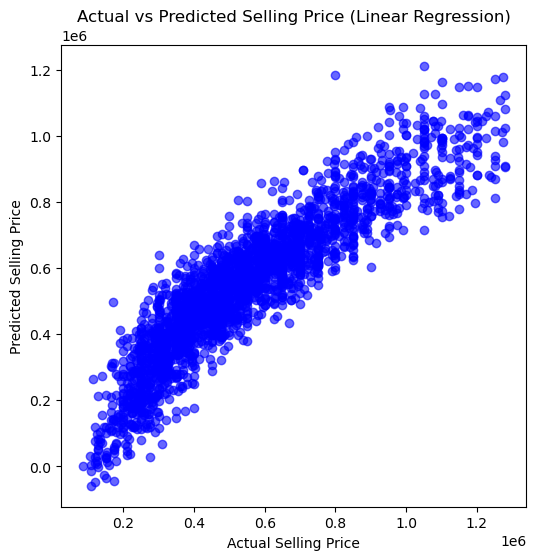

In [225]:
y_pred = lr.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Linear Regression)")
plt.show()


### Residual Analysis

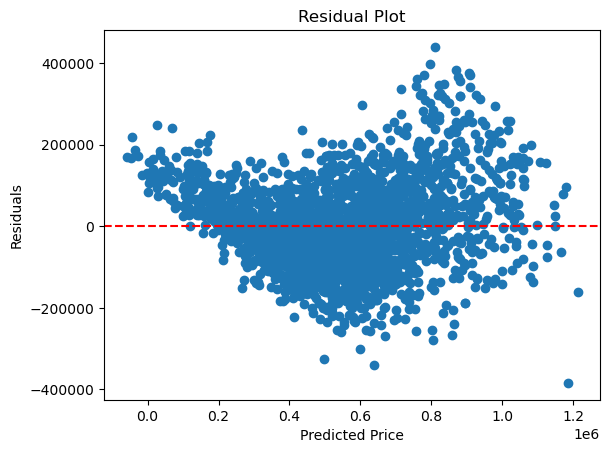

In [226]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()


### Model Comparison (Visual)

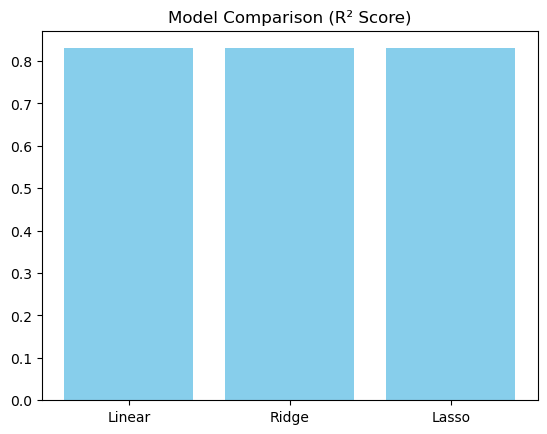

In [227]:
models = ['Linear', 'Ridge', 'Lasso']
r2_scores = [0.8301, 0.8296, 0.8301]
rmse_scores = [103239, 103388, 103232]

plt.bar(models, r2_scores, color='skyblue')
plt.title('Model Comparison (R² Score)')
plt.show()


### Saving The Model

In [228]:
import joblib
joblib.dump(model, 'car_price_model.pkl')

['car_price_model.pkl']

In [229]:
data.columns

Index(['brand', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage_kmpl', 'max_power', 'seats',
       'selling_price', 'power_per_CC', 'model_encoded'],
      dtype='object')

In [230]:
# Example: New car data for testing
new_car = pd.DataFrame([{
    'brand': 5,               # Encoded value (e.g., Maruti=5)
    'vehicle_age': 4,         # Car age in years
    'km_driven': 45000,       # Total km driven
    'seller_type': 1,         # Dealer
    'fuel_type': 3,           # Petrol
    'transmission_type': 1,   # Manual
    'mileage_kmpl': 18.2,     # Mileage
    'max_power': 83,          # Engine power
    'seats': 5,               # Seats
    'power_per_CC': 0.068,    # Derived feature
    'model_encoded': 470000   # Encoded model price
}])

# Predict selling price
predicted_price = lr.predict(new_car)
print("Predicted Selling Price (in ₹):", predicted_price[0])


Predicted Selling Price (in ₹): 529919.4572161197


In [231]:
data

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage_kmpl,max_power,seats,selling_price,power_per_CC,model_encoded
0,10,9,120000,1,3,1,19.70,46.30,5,120000,0.06,253954.02
1,5,5,20000,1,3,1,18.90,82.00,5,550000,0.07,475872.11
2,5,11,60000,1,3,1,17.00,80.00,5,215000,0.07,545175.87
3,10,9,37000,1,3,1,20.92,67.10,5,226000,0.07,253954.02
4,3,6,30000,0,1,1,22.77,98.59,5,570000,0.07,712251.45
...,...,...,...,...,...,...,...,...,...,...,...,...
15405,5,5,9229,0,3,1,18.90,82.00,5,545000,0.07,475872.11
15406,5,9,10723,0,3,1,19.81,68.05,5,250000,0.06,279818.86
15407,10,2,18000,0,3,1,17.50,91.10,7,925000,0.07,721271.08
15408,14,6,67000,0,1,1,21.14,103.52,5,425000,0.07,570321.84
